In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
os.listdir('./sales2019data')

['sales2019_1.csv',
 'sales2019_10.csv',
 'sales2019_11.csv',
 'sales2019_12.csv',
 'sales2019_2.csv',
 'sales2019_3.csv',
 'sales2019_4.csv',
 'sales2019_5.csv',
 'sales2019_6.csv',
 'sales2019_7.csv',
 'sales2019_8.csv',
 'sales2019_9.csv']

In [6]:
# --> it's an array with file name !!!
dataDirPath = './sales2019data' # data directory path
filepaths = []
for fileName in os.listdir(dataDirPath):
    if fileName.endswith('.csv'):
        filepath = dataDirPath + "/" + fileName
        filepaths.append(filepath)


filepaths

['./sales2019data/sales2019_1.csv',
 './sales2019data/sales2019_10.csv',
 './sales2019data/sales2019_11.csv',
 './sales2019data/sales2019_12.csv',
 './sales2019data/sales2019_2.csv',
 './sales2019data/sales2019_3.csv',
 './sales2019data/sales2019_4.csv',
 './sales2019data/sales2019_5.csv',
 './sales2019data/sales2019_6.csv',
 './sales2019data/sales2019_7.csv',
 './sales2019data/sales2019_8.csv',
 './sales2019data/sales2019_9.csv']

In [8]:
# merge / joining dataframe pandas
df_frames = []

for filepath in filepaths:
    df = pd.read_csv(filepath)
    df_frames.append(df)

sales2019_df = pd.concat(df_frames)
sales2019_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [12]:
sales2019_df.to_csv('annualSales2019.csv', index=False) # saving to a new file, and the index column is not necessery

In [13]:
# now let reload with our new file
sales2019_df = pd.read_csv('./annualSales2019.csv')

In [14]:
sales2019_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [18]:
# adding "Month" column

sales2019_df['Month'] = sales2019_df['Order Date'].str[0:2]
sales2019_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [19]:
# get unique values of Month columns
set(sales2019_df['Month'])

{'01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 'Or',
 nan}

In [21]:
# we see there are "Nan", "Or" value --> need to get rid of those --> cleaning the data frame

In [28]:
sales2019_df = sales2019_df.dropna(how='all') # remove rows that have empty values

In [29]:
set(sales2019_df['Month'])

{'01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', 'Or'}

In [34]:
sales2019_df[sales2019_df['Month'] == 'Or'] # rows has value 'Or'

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [35]:
sales2019_df = sales2019_df[sales2019_df['Month'] != 'Or'] # remove rows has value 'Or'

In [36]:
# which months have the best sales? And how much
# Quanity_ordered * priceEach --> sale of each row
# and combine rows that have same month

sales2019_df['sales'] = sales2019_df['Quantity Ordered'] * sales2019_df['Price Each']


TypeError: can't multiply sequence by non-int of type 'str'

In [37]:
# !!oops, let's see their types
print(sales2019_df['Quantity Ordered'].dtype)
print(sales2019_df['Price Each'].dtype)

object
object


In [38]:
# they're object !, let's convert them
sales2019_df['Quantity Ordered'] = pd.to_numeric(sales2019_df['Quantity Ordered'], downcast='integer')
sales2019_df['Price Each'] = pd.to_numeric(sales2019_df['Price Each'], downcast='float')

print(sales2019_df['Quantity Ordered'].dtype)
print(sales2019_df['Price Each'].dtype)

int8
float32


In [39]:
sales2019_df['sales'] = sales2019_df['Quantity Ordered'] * sales2019_df['Price Each']
sales2019_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000


In [40]:
# moving 'Sales' column right behind the 'Price Each' column
moving_column = sales2019_df.pop('sales')
sales2019_df.insert(4, 'Sales', moving_column)
sales2019_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [45]:
sales_value = sales2019_df.groupby('Month').sum()['Sales']
sales_value

C:\Users\Acer\AppData\Local\Temp\ipykernel_19172\2107595640.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_value = sales2019_df.groupby('Month').sum()['Sales']


Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

In [46]:
sales_value.max()

4613443.5

Text(0, 0.5, 'sales in usd')

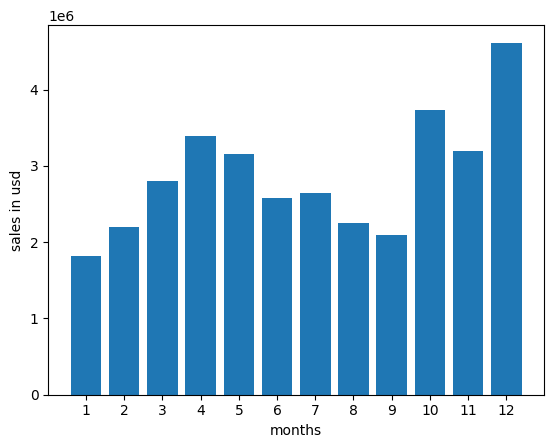

In [50]:
months = np.arange(1, 13)
plt.bar(x=months, height=sales_value)
plt.xticks(months)
plt.xlabel('months')
plt.ylabel('sales in usd')

In [51]:
# what city has the best sales

sales2019_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [53]:
# the city is in the middle of 2 ",", let's test it out

sample_address = '944 Walnut St, Boston, MA 02215'
sample_address.split(',')[1]

' Boston'

In [54]:
# we'll gonna write a function to get city name like above

def get_city(address):
    return address.split(',')[1]

# or you can write the lambda version
get_city_lambda = lambda address:address.split(',')[1]

In [55]:
sales2019_df['City'] = sales2019_df['Purchase Address'].apply(get_city_lambda)
sales2019_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [58]:
sales_value_by_city =  sales2019_df.groupby('City').sum()['Sales']
sales_value_by_city

C:\Users\Acer\AppData\Local\Temp\ipykernel_19172\3678757721.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_value_by_city =  sales2019_df.groupby('City').sum()['Sales']


City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32

In [61]:
sales_value_by_city.max()

8262204.0

In [69]:
# draw bar chart
cities = []

for index, value in sales_value_by_city.items():
    print(index,' ', value)
    # cities.append(index)

# we can use the list comprehension
cities = [index for index, value in sales_value_by_city.items()]

 Atlanta   2795498.5
 Austin   1819581.75
 Boston   3661642.0
 Dallas   2767975.5
 Los Angeles   5452571.0
 New York City   4664317.5
 Portland   2320490.5
 San Francisco   8262204.0
 Seattle   2747755.5


In [70]:
cities

[' Atlanta',
 ' Austin',
 ' Boston',
 ' Dallas',
 ' Los Angeles',
 ' New York City',
 ' Portland',
 ' San Francisco',
 ' Seattle']

Text(0, 0.5, 'sales in usd')

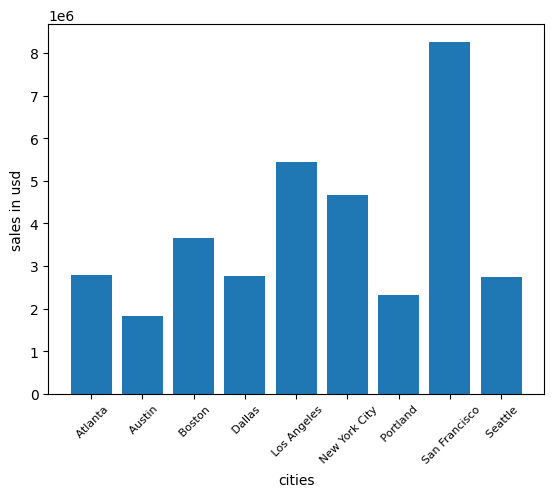

In [76]:
plt.bar(x=cities, height=sales_value_by_city)
plt.xticks(rotation=45, size=8)
plt.xlabel('cities', )
plt.ylabel('sales in usd')

In [77]:
# total sales according to hours --> to know which hour should advertise for maximum sales

# convert object, str to date time object
sales2019_df['Order Date'] = pd.to_datetime(sales2019_df['Order Date'])

# now get hour from that date time object
sales2019_df['Order Hour'] = sales2019_df['Order Date'].dt.hour
sales2019_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Order Hour
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [78]:
sales_value_by_hour =  sales2019_df.groupby('Order Hour').sum()['Sales']
sales_value_by_hour

C:\Users\Acer\AppData\Local\Temp\ipykernel_19172\2554994514.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_value_by_hour =  sales2019_df.groupby('Order Hour').sum()['Sales']


Order Hour
0     7.137212e+05
1     4.608669e+05
2     2.348514e+05
3     1.457579e+05
4     1.626610e+05
5     2.306798e+05
6     4.481130e+05
7     7.448541e+05
8     1.192349e+06
9     1.639031e+06
10    1.944287e+06
11    2.300610e+06
12    2.316821e+06
13    2.155390e+06
14    2.083673e+06
15    1.941550e+06
16    1.904601e+06
17    2.129362e+06
18    2.219348e+06
19    2.412938e+06
20    2.281716e+06
21    2.042001e+06
22    1.607549e+06
23    1.179304e+06
Name: Sales, dtype: float32

In [79]:
hours = [index for index, value in sales_value_by_hour.items()]

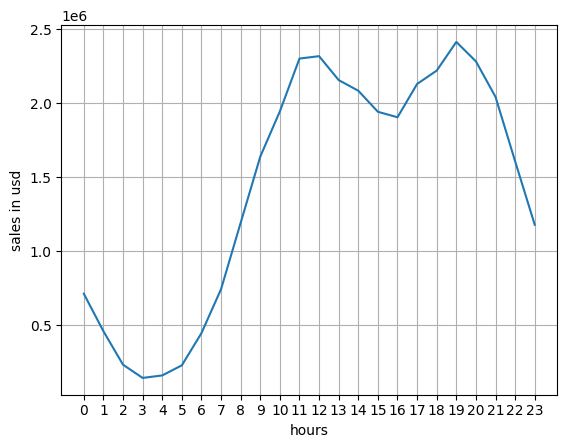

In [82]:
plt.plot(hours, sales_value_by_hour)
plt.xticks(hours)
plt.xlabel('hours')
plt.ylabel('sales in usd')
plt.grid()

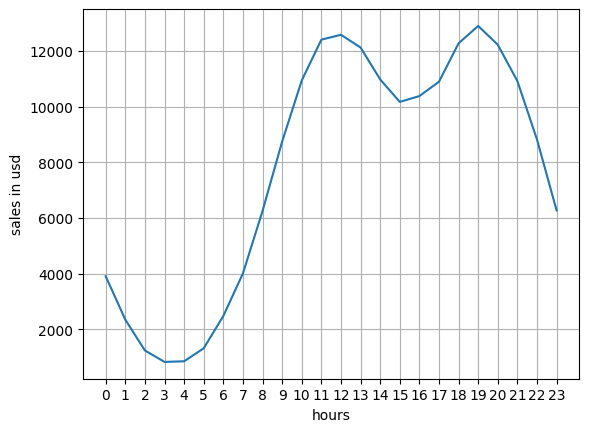

In [85]:
# but we want total sales mean total orders in a partitular hour

# replace sum() with count(): count number of sales == number of orders
sales_count_by_hour =  sales2019_df.groupby('Order Hour').count()['Sales'] 
hours = [index for index, value in sales_count_by_hour.items()]
plt.plot(hours, sales_count_by_hour)
plt.xticks(hours)
plt.xlabel('hours')
plt.ylabel('sales in usd')
plt.grid()


In [86]:
# so before 11, 12h, when people relax and scroll their facebook, that's when 
# we should advertise, to get maximum number of orders
sales_count_by_hour

Order Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Sales, dtype: int64

In [87]:
sales2019_df.groupby('Order Hour').count()
# group by column 'Order Hour'
# what we do with other columns is: count()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
Order Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


In [88]:
# what products are often sold together? people buy in combos

In [89]:
# prouducts are often buy together are: same order date, same order location of the same person
# or most simple is: they are in the same order (same orderId)

In [102]:
# combining multiple rows into one row with the same orderId

# get a new copy dataFrame that has many duplicated orderId(s)
# because we only need rows that have same orderId 
# --> more than 2 products --> products are often sold together

# finding rows that have duplicated id
# keep=False --> mark all duplicated rows as True
# the new dataFrame only keeps the rows that marked as True
sales2019_df_dup_ids = sales2019_df[sales2019_df['Order ID'].duplicated(keep=False)] 
sales2019_df_dup_ids


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Order Hour
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11
...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",09,Atlanta,20
186803,259314,Wired Headphones,1,11.99,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,Atlanta,0
186804,259314,AAA Batteries (4-pack),2,2.99,5.98,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,Atlanta,0
186841,259350,Google Phone,1,600.00,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",09,San Francisco,13


In [98]:
def joinProducts(products):
    return ', '.join(products)

# test
joinProducts(['1', '2', '3'])

'1, 2, 3'

In [93]:
# or the lambda version
joinProducts_lambda = lambda products: ', '.join(products)

In [108]:
sales2019_df_dup_ids['All products'] = sales2019_df_dup_ids.groupby('Order ID')['Product'].transform(joinProducts_lambda)
# grouping by 'Order ID'
# and do joinProducts() with column 'Product'
# apply() and tranform() almost the same
# but apply() return dataFrames if the function it's using return Series Object :(
# we need return type: Series 

C:\Users\Acer\AppData\Local\Temp\ipykernel_19172\2007624805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales2019_df_dup_ids['All products'] = sales2019_df_dup_ids.groupby('Order ID')['Product'].transform(joinProducts_lambda)


In [109]:
sales2019_df_dup_ids.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Order Hour,All products
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11,"Vareebadd Phone, Wired Headphones"


In [114]:
# after that, we still see rows that have same order Id --> remove that, just keep one 
# drop duplicated rows base on columns: 'Order ID' and 'All prouducts'
# by default it will depends on all columns
sales2019_df_dup_ids = sales2019_df_dup_ids[['Order ID', 'All products']].drop_duplicates()
sales2019_df_dup_ids.head()

,Order ID,All products
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"


In [115]:
# find out which pair of products that sold together are bought the most
sales2019_df_dup_ids['All products'].value_counts().head(10)

iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: All products, dtype: int64

In [116]:
# well, looks like iphone and it's charging cable is too obvious !
# --> discount price when customers buy these 2 together